In [ ]:
# Compare row at 19459242 and 20115838
# Values: 11878942766912072317, 11887949966166813309
# Hamming distance: 1

In [1]:
import numpy as np
import os

In [2]:
# Function to load annotation bit vector from file
def load_annotation_bit_vector_little(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Failed to open file: {file_path}")

    with open(file_path, 'rb') as file:
        byte_data = file.read()

    bit_vector = []
    for byte in byte_data:
        for i in range(8):
            bit_vector.append((byte >> i) & 1)

    return bit_vector

# Function to load specific positions from annotation bit vector
def load_annotation_bit_vector_positions_little(file_path, positions):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Failed to open file: {file_path}")

    with open(file_path, 'rb') as file:
        byte_data = file.read()

    bit_vector = []
    for position in positions:
        byte_index = position // 8
        bit_index = position % 8
        bit_vector.append((byte_data[byte_index] >> bit_index) & 1)

    return bit_vector

try:
    file_path = "anno_SRR2125928.fastq_embedding_little.bin"
    
    # bit_vector = load_annotation_bit_vector_little(file_path)
    # print("Unpacked bits in little-endian order:")
    # for i in range(min(16, len(bit_vector))):
    #     print(bit_vector[i], end='')
    #     if (i + 1) % 16 == 0:
    #         print(" ", end='')

    # print(f"\nNumber of bits: {len(bit_vector)}")
    
    positions = [0, 1, 2, 3, 4, 5, 6, 7]
    bit_vector = load_annotation_bit_vector_positions_little(file_path, positions)
    print(f"Unpacked bits at positions {positions}:")
    
    for i in range(len(bit_vector)):
        print(bit_vector[i], end='')
        if (i + 1) % 16 == 0:
            print(" ", end='')
        
    print(f"\nNumber of bits: {len(bit_vector)}")
    
except Exception as e:
    print(f"Error: {e}")

Unpacked bits at positions [0, 1, 2, 3, 4, 5, 6, 7]:
00100001
Number of bits: 8


In [3]:
# get file list
file_list = os.listdir()
file_list = [f for f in file_list if f.startswith("anno_") and f.endswith(".bin")]

In [20]:
# positions = [15160083, 15360551]
# positions = [36942201, 37938010]

def compare_rows(positions):
    annotation_bit_vectors = []

    # Load annotation bit vectors
    for file_path in file_list:
        try:
            bit_vector = load_annotation_bit_vector_positions_little(file_path, positions)
            annotation_bit_vectors.append(bit_vector)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    # Ensure we have at least two files to compare
    if len(annotation_bit_vectors) < 2:
        print("Error: Not enough annotation bit vectors for comparison.")
        return None

    # Convert to NumPy array for vectorized operations
    annotation_bit_vectors = np.array(annotation_bit_vectors, dtype=np.bool_)

    # Transpose to [length][file] (if needed)
    annotation_bit_vectors = annotation_bit_vectors.T

    # Compute Hamming distance (number of differing bits)
    hamming_distance = np.sum(annotation_bit_vectors[0] != annotation_bit_vectors[1])

    return hamming_distance

In [21]:
compare_rows([5, 10])

10

In [83]:
all_pairs = np.load("pair_points.npy")

In [92]:
inside_clusted_hamming_distance_records = []
for each_pair in all_pairs:
    hamming_distance = compare_rows(each_pair)
    inside_clusted_hamming_distance_records.append(hamming_distance)

In [100]:
inside_clusted_hamming_distance_records = np.array(inside_clusted_hamming_distance_records)

print(f"Mean hamming distance: {np.mean(inside_clusted_hamming_distance_records)}")

Mean hamming distance: 4.092840061893375


In [96]:
# Plot the distribution of Hamming distances using violin plot
import matplotlib.pyplot as plt

def plot_violin(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.violinplot(data, showmeans=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

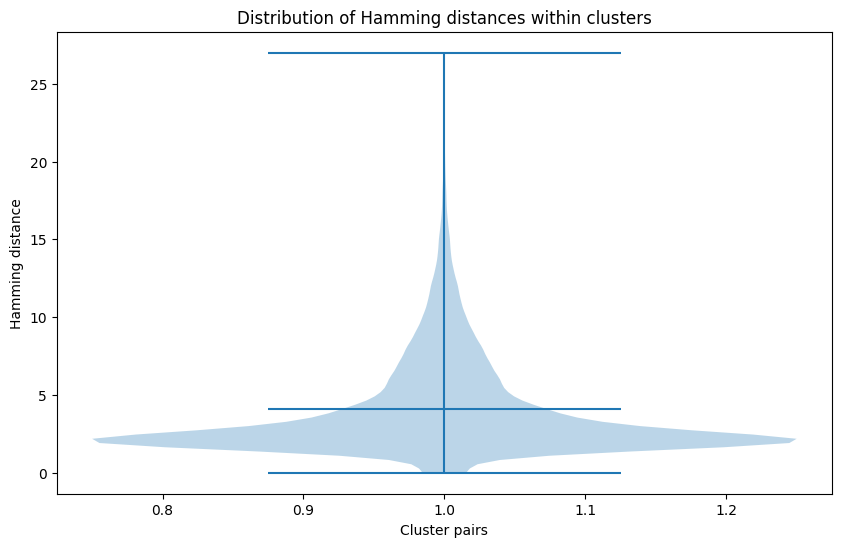

In [97]:
plot_violin(inside_clusted_hamming_distance_records, "Distribution of Hamming distances within clusters", "Cluster pairs", "Hamming distance")

In [94]:
# random select 7109 pairs
import random

# sample (7109, 2) random numbers from 0 to 60,801,407
all_pairs = random.sample(range(60801408), 7109*2)
all_pairs = np.array(all_pairs).reshape(-1, 2)
print(all_pairs)

# random_pair_avg_hamming_distance = 0
random_pair_hamming_distance_records = []
for each_pair in all_pairs:
    hamming_distance = compare_rows(each_pair)
    random_pair_hamming_distance_records.append(hamming_distance)

[[ 6009236 43277573]
 [39858553 23647464]
 [27372427 17210549]
 ...
 [54921995 28965884]
 [38232185 59605080]
 [15873627 28626271]]


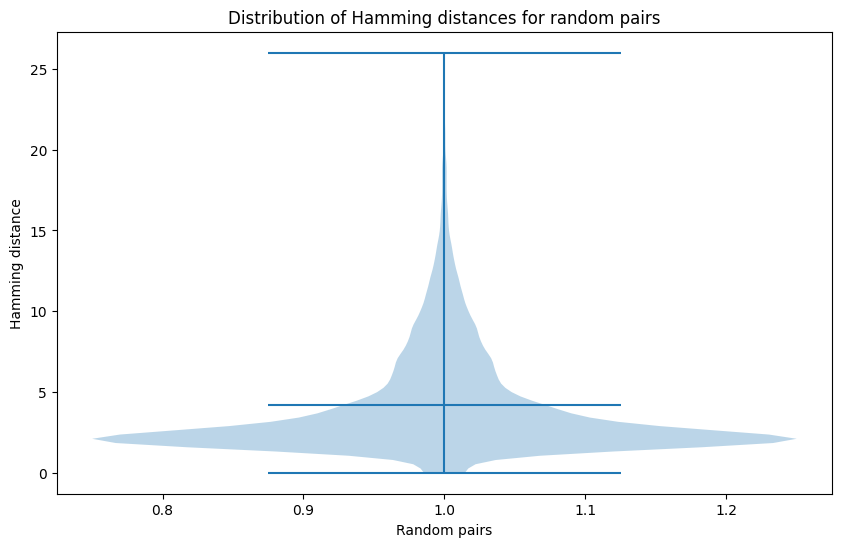

In [98]:
plot_violin(random_pair_hamming_distance_records, "Distribution of Hamming distances for random pairs", "Random pairs", "Hamming distance")

In [99]:
random_pair_hamming_distance_records = np.array(random_pair_hamming_distance_records)
print(f"Average Hamming distance for random pairs: {np.mean(random_pair_hamming_distance_records)}")

Average Hamming distance for random pairs: 4.1619074412716275
